# Import dataset from google drive

In [ ]:
# Import modul drive dari library google.colab untuk mengkoneksikan Google Colab dengan Google Drive
from google.colab import drive

# Memanggil fungsi mount dari modul drive untuk memasang Google Drive pada path /content/drive di Google Colab
# Kemudian Google Colab akan meminta izin akses ke Google Drive melalui tautan yang diberikan
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
from scipy import stats
import matplotlib.pyplot as plt # membuat grafik
%matplotlib inline
import seaborn as sns # membuat grafik interaktif
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

# Library untuk mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mengimpor modul pandas dengan alias pd untuk digunakan dalam skrip
import pandas as pd

# Menggunakan fungsi read_csv dari modul pandas untuk membaca dataset yang tersimpan di Google Drive
# Path '/content/drive/My Drive/Orbit Dataset/Dataset Orbit.csv' menunjukkan lokasi file dataset di Google Drive
# Hasil pembacaan dataset disimpan dalam variabel df (DataFrame)
df = pd.read_csv('/content/drive/MyDrive/PA OFA KELOMPOK 4 SHEPARD/Program/Copy of Dataset Orbit.csv')

# Menampilkan beberapa baris pertama dari dataset menggunakan fungsi head() dari DataFrame df
print(df.head())

   tinggi_badan  berat_badan  tekanan_darah_sistolik  tekanan_darah_diastolik  \
0         160.0         64.0                     120                       80   
1         150.0         85.0                     131                       76   
2         144.0         71.0                     119                       92   
3         150.0         61.0                     140                       90   
4         157.0         70.0                     140                       90   

   usia  paritas  riwayat_hipertensi  riwayat_preeklamsia level_risiko  
0    27        0                   0                    0       Sedang  
1    46        4                   0                    0       Sedang  
2    44        3                   0                    0       Sedang  
3    44        2                   1                    0       Tinggi  
4    43        4                   1                    0       Tinggi  


# Data Understanding

1. Tinggi Badan
   - Satuan Ukur: Sentimeter

2. Berat Badan
   - Satuan Ukur: Kilogram

3. Tekanan Darah Sistolik (Systolic Blood Pressure)
   - Satuan Ukur: mmHg

4. Tekanan Darah Diastolik (Diastolic Blood Pressure)
   - Satuan Ukur: mmHg

5. Usia
   - Satuan Ukur: Tahun

6. Paritas (Jumlah Kelahiran)
   - Satuan Ukur: Jumlah Kelahiran Hidup

7. Riwayat Hipertensi (Riwayat Hipertensi Ibu)
   - Ada Riwayat Hipertensi: 1
   - Tidak Ada Riwayat Hipertensi: 0

8. Riwayat Preeklamsia
   - Ada Riwayat Preeklamsia: 1
   - Tidak Ada Riwayat Preeklamsia: 0

9. Level Risiko
   - Tinggi
   - Sedang
   - Tidak Berisiko

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [ ]:
# Menggunakan metode info() dari objek DataFrame (df) untuk mendapatkan informasi tentang dataset
# Informasi yang ditampilkan termasuk jumlah baris dan kolom, nama dan tipe data setiap kolom,
# serta jumlah nilai non-null dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tinggi_badan             447 non-null    float64
 1   berat_badan              447 non-null    float64
 2   tekanan_darah_sistolik   447 non-null    int64  
 3   tekanan_darah_diastolik  447 non-null    int64  
 4   usia                     447 non-null    int64  
 5   paritas                  447 non-null    int64  
 6   riwayat_hipertensi       447 non-null    int64  
 7   riwayat_preeklamsia      447 non-null    int64  
 8   level_risiko             447 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 31.6+ KB


In [ ]:
# Menggunakan metode isnull() dari objek DataFrame (df) untuk mendeteksi nilai-nilai yang kosong (NaN/null)
# Kemudian menggunakan metode sum() untuk menjumlahkan jumlah nilai kosong dalam setiap kolom
# Hasilnya adalah jumlah nilai kosong dalam setiap kolom dalam DataFrame df.
df.isnull().sum()

tinggi_badan               0
berat_badan                0
tekanan_darah_sistolik     0
tekanan_darah_diastolik    0
usia                       0
paritas                    0
riwayat_hipertensi         0
riwayat_preeklamsia        0
level_risiko               0
dtype: int64

In [ ]:
# Menggunakan metode head() dari objek DataFrame (df) untuk menampilkan beberapa baris pertama dari dataset
# Secara default, metode head() akan menampilkan lima baris pertama dari DataFrame df.
df.head()

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
0,160.0,64.0,120,80,27,0,0,0,Sedang
1,150.0,85.0,131,76,46,4,0,0,Sedang
2,144.0,71.0,119,92,44,3,0,0,Sedang
3,150.0,61.0,140,90,44,2,1,0,Tinggi
4,157.0,70.0,140,90,43,4,1,0,Tinggi


In [ ]:
# Menggunakan metode describe() dari objek DataFrame (df) dengan parameter include='all'
# untuk mendapatkan statistik deskriptif untuk semua kolom, termasuk kolom-kolom dengan tipe data non-numeric.
# Metode ini akan memberikan ringkasan statistik seperti count, mean, std, min, quartiles, dan max
# untuk setiap kolom numerik, serta informasi tentang jumlah nilai unik, nilai terbanyak, dan frekuensi
# nilai terbanyak untuk kolom-kolom non-numeric.
df.describe(include='all')

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268
mean,152.535570,64.646756,117.930649,76.263982,32.170022,1.348993,0.064877,0.109620,NaN
std,5.646131,13.886362,13.359873,9.219161,7.288894,1.273705,0.246585,0.312765,NaN
min,136.000000,34.500000,90.000000,56.000000,17.000000,0.000000,0.000000,0.000000,NaN
25%,149.000000,54.000000,110.000000,70.000000,25.000000,0.000000,0.000000,0.000000,NaN
50%,152.000000,64.000000,120.000000,80.000000,35.000000,1.000000,0.000000,0.000000,NaN
75%,157.000000,72.650000,120.000000,80.000000,38.000000,2.000000,0.000000,0.000000,NaN


In [ ]:
# Mengimpor modul matplotlib.pyplot dengan alias plt untuk membuat grafik
import matplotlib.pyplot as plt

# Mengaktifkan mode inline agar grafik yang dihasilkan ditampilkan di notebook secara langsung
%matplotlib inline

# Mengimpor modul seaborn dengan alias sns untuk membuat grafik interaktif
import seaborn as sns

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Lakukan RandomUnderSampling untuk seluruh kolom
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(df.drop('level_risiko', axis=1), df['level_risiko'])
df = pd.concat([pd.DataFrame(X_under, columns=df.columns[:-1]), pd.DataFrame(y_under, columns=['level_risiko'])], axis=1)



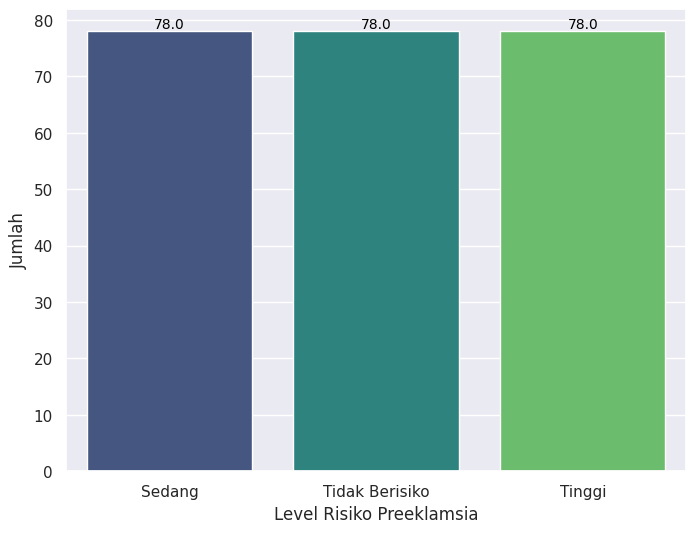

In [ ]:
# Mengatur gaya plot menjadi darkgrid menggunakan metode set() dari modul seaborn (sns)
sns.set(style="darkgrid")

# Membuat objek figure dengan ukuran 8x6 menggunakan fungsi figure() dari modul matplotlib.pyplot (plt)
plt.figure(figsize=(8, 6))

# Memplot countplot menggunakan countplot() dari modul seaborn (sns)
# dengan x='level_risiko' untuk menentukan kolom yang akan diplot, dan data=df untuk menentukan DataFrame
# palette='viridis' digunakan untuk menentukan skema warna yang akan digunakan
ax = sns.countplot(x='level_risiko', data=df, palette='viridis')

# Menambahkan label count di atas setiap bar menggunakan metode annotate() dari objek ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan label sumbu x dan y
plt.xlabel('Level Risiko Preeklamsia')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

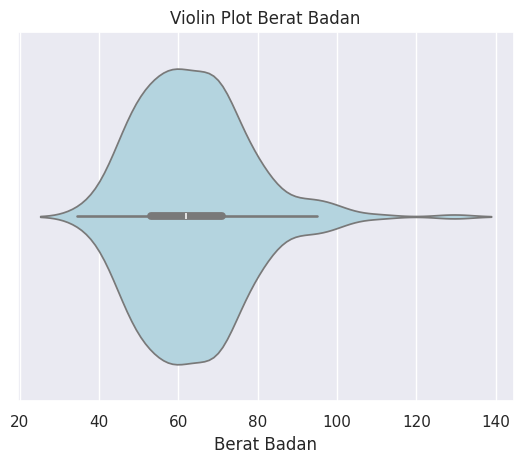

In [ ]:
# Memplot violin plot menggunakan violinplot() dari modul seaborn (sns)
# df['berat_badan'] adalah data yang akan diplot, color='lightblue' menentukan warna plot,
# orient='h' menentukan orientasi plot menjadi horizontal
sns.violinplot(df['berat_badan'], color='lightblue', orient='h')

# Menambahkan judul plot
plt.title('Violin Plot Berat Badan')

# Menambahkan label sumbu x
plt.xlabel('Berat Badan')

# Menampilkan plot
plt.show()

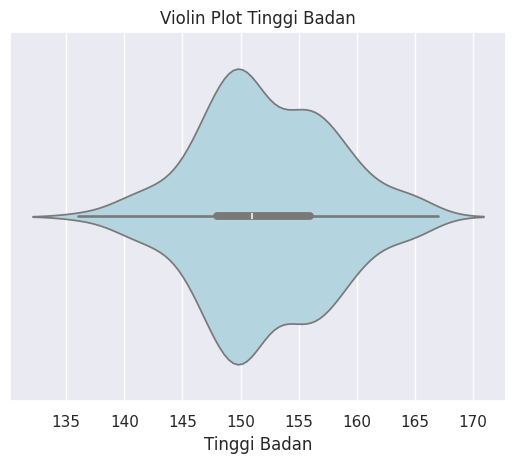

In [ ]:
# Memplot violin plot menggunakan violinplot() dari modul seaborn (sns)
# df['tinggi_badan'] adalah data yang akan diplot, color='lightblue' menentukan warna plot,
# orient='h' menentukan orientasi plot menjadi horizontal
sns.violinplot(df['tinggi_badan'], color='lightblue', orient='h')

# Menambahkan judul plot
plt.title('Violin Plot Tinggi Badan')

# Menambahkan label sumbu x
plt.xlabel('Tinggi Badan')

# Menampilkan plot
plt.show()

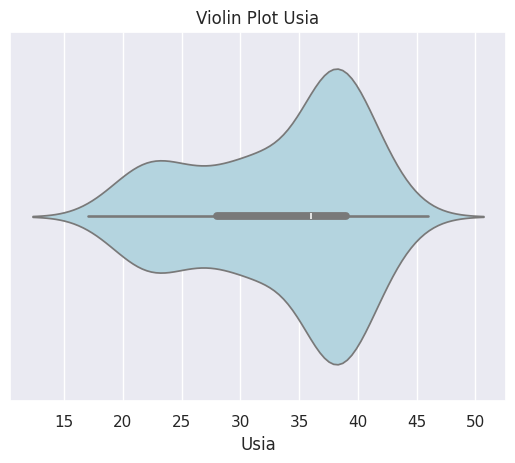

In [ ]:
# Memplot violin plot menggunakan violinplot() dari modul seaborn (sns)
# df['usia'] adalah data yang akan diplot, color='lightblue' menentukan warna plot,
# orient='h' menentukan orientasi plot menjadi horizontal
sns.violinplot(df['usia'], color='lightblue', orient='h')

# Menambahkan judul plot
plt.title('Violin Plot Usia')

# Menambahkan label sumbu x
plt.xlabel('Usia')

# Menampilkan plot
plt.show()

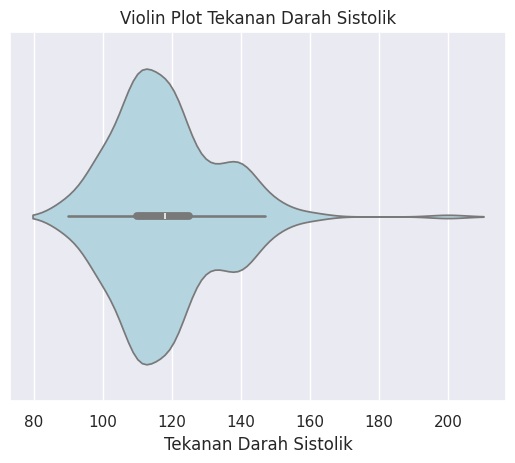

In [ ]:
# Memplot violin plot menggunakan violinplot() dari modul seaborn (sns)
# df['tekanan_darah_sistolik'] adalah data yang akan diplot, color='lightblue' menentukan warna plot,
# orient='h' menentukan orientasi plot menjadi horizontal
sns.violinplot(df['tekanan_darah_sistolik'], color='lightblue', orient='h')

# Menambahkan judul plot
plt.title('Violin Plot Tekanan Darah Sistolik')

# Menambahkan label sumbu x
plt.xlabel('Tekanan Darah Sistolik')

# Menampilkan plot
plt.show()

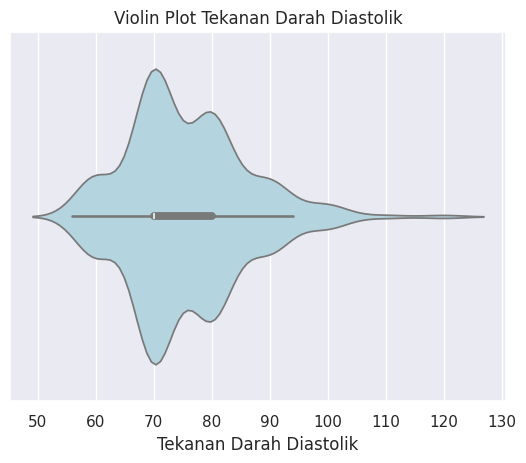

In [ ]:
# Memplot violin plot menggunakan violinplot() dari modul seaborn (sns)
# df['tekanan_darah_diastolik'] adalah data yang akan diplot, color='lightblue' menentukan warna plot,
# orient='h' menentukan orientasi plot menjadi horizontal
sns.violinplot(df['tekanan_darah_diastolik'], color='lightblue', orient='h')

# Menambahkan judul plot
plt.title('Violin Plot Tekanan Darah Diastolik')

# Menambahkan label sumbu x
plt.xlabel('Tekanan Darah Diastolik')

# Menampilkan plot
plt.show()

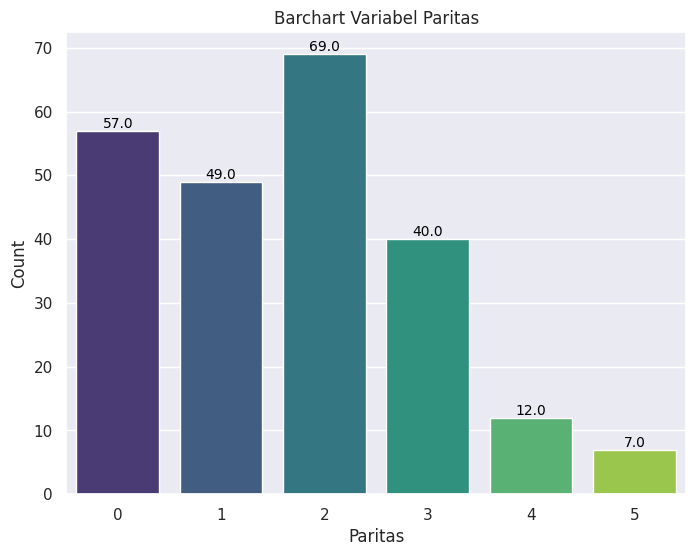

In [ ]:
# Mengatur gaya plot menjadi darkgrid menggunakan metode set() dari modul seaborn (sns)
sns.set(style="darkgrid")

# Membuat objek figure dengan ukuran 8x6 menggunakan fungsi figure() dari modul matplotlib.pyplot (plt)
plt.figure(figsize=(8, 6))

# Memplot countplot menggunakan countplot() dari modul seaborn (sns)
# dengan x='paritas' untuk menentukan kolom yang akan diplot, dan data=df untuk menentukan DataFrame
# palette='viridis' digunakan untuk menentukan skema warna yang akan digunakan
ax = sns.countplot(x='paritas', data=df, palette='viridis')

# Menambahkan label count di atas setiap bar menggunakan metode annotate() dari objek ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul plot
plt.title('Barchart Variabel Paritas')

# Menambahkan label sumbu x dan y
plt.xlabel('Paritas')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

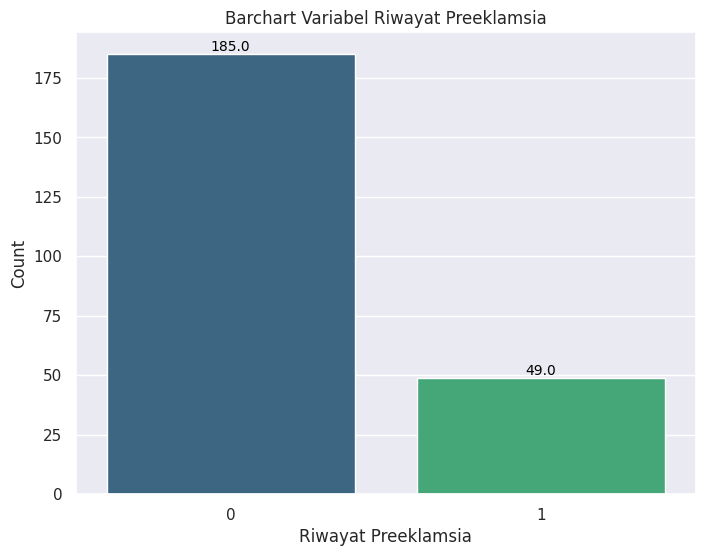

In [ ]:
# Mengatur gaya plot menjadi darkgrid menggunakan metode set() dari modul seaborn (sns)
sns.set(style="darkgrid")

# Membuat objek figure dengan ukuran 8x6 menggunakan fungsi figure() dari modul matplotlib.pyplot (plt)
plt.figure(figsize=(8, 6))

# Memplot countplot menggunakan countplot() dari modul seaborn (sns)
# dengan x='riwayat_preeklamsia' untuk menentukan kolom yang akan diplot, dan data=df untuk menentukan DataFrame
# palette='viridis' digunakan untuk menentukan skema warna yang akan digunakan
ax = sns.countplot(x='riwayat_preeklamsia', data=df, palette='viridis')

# Menambahkan label count di atas setiap bar menggunakan metode annotate() dari objek ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul plot
plt.title('Barchart Variabel Riwayat Preeklamsia')

# Menambahkan label sumbu x dan y
plt.xlabel('Riwayat Preeklamsia')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

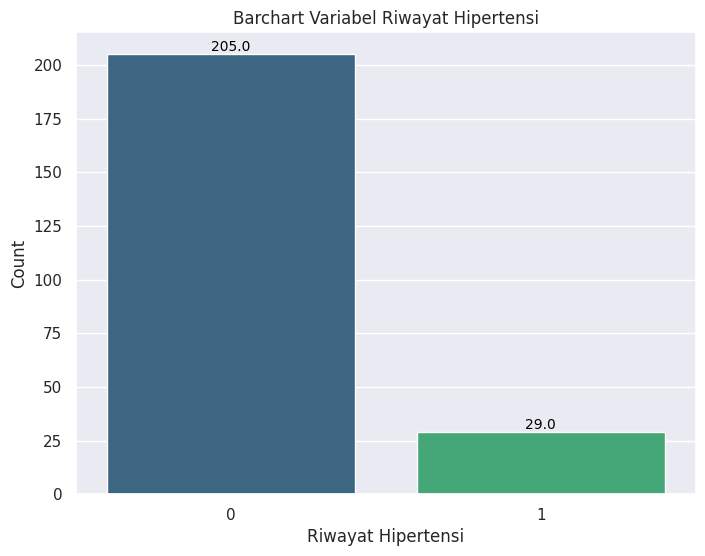

In [ ]:
# Mengatur gaya plot menjadi darkgrid menggunakan metode set() dari modul seaborn (sns)
sns.set(style="darkgrid")

# Membuat objek figure dengan ukuran 8x6 menggunakan fungsi figure() dari modul matplotlib.pyplot (plt)
plt.figure(figsize=(8, 6))

# Memplot countplot menggunakan countplot() dari modul seaborn (sns)
# dengan x='riwayat_hipertensi' untuk menentukan kolom yang akan diplot, dan data=df untuk menentukan DataFrame
# palette='viridis' digunakan untuk menentukan skema warna yang akan digunakan
ax = sns.countplot(x='riwayat_hipertensi', data=df, palette='viridis')

# Menambahkan label count di atas setiap bar menggunakan metode annotate() dari objek ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul plot
plt.title('Barchart Variabel Riwayat Hipertensi')

# Menambahkan label sumbu x dan y
plt.xlabel('Riwayat Hipertensi')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

# Preprocessing Data

In [ ]:
# Mengganti kategori pada kolom 'level_risiko' menjadi integer.
# Menggunakan metode replace() pada kolom 'level_risiko' dari DataFrame df.
# Kategori "Tinggi" diubah menjadi "2", "Sedang" diubah menjadi "1", dan "Tidak Berisiko" diubah menjadi "0".
# Argumen inplace=True digunakan untuk menyimpan perubahan pada DataFrame df.
df['level_risiko'].replace({"Tinggi": "2", "Sedang": "1", "Tidak Berisiko" : "0"}, inplace=True)

# Menampilkan lima baris pertama dari DataFrame df setelah perubahan kategori
df.head()

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
0,155.0,79.0,110,70,33,0,0,0,1
1,150.0,64.0,120,85,22,0,0,0,1
2,152.0,66.0,130,80,39,3,0,0,1
3,150.0,69.0,120,77,30,3,0,0,1
4,146.0,72.0,200,120,32,0,0,0,1


In [ ]:
# Mengubah tipe data kolom 'level_risiko' menjadi int64 menggunakan metode astype() dari pandas.
# df["level_risiko"] merupakan pemilihan kolom yang akan diubah tipe datanya.
# "int64" adalah tipe data yang diinginkan.
df["level_risiko"] = df["level_risiko"].astype("int64")

In [ ]:
# Menggunakan metode info() dari objek DataFrame (df) untuk mendapatkan informasi tentang dataset setelah perubahan.
# Informasi yang ditampilkan termasuk jumlah baris dan kolom, nama dan tipe data setiap kolom,
# serta jumlah nilai non-null dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tinggi_badan             234 non-null    float64
 1   berat_badan              234 non-null    float64
 2   tekanan_darah_sistolik   234 non-null    int64  
 3   tekanan_darah_diastolik  234 non-null    int64  
 4   usia                     234 non-null    int64  
 5   paritas                  234 non-null    int64  
 6   riwayat_hipertensi       234 non-null    int64  
 7   riwayat_preeklamsia      234 non-null    int64  
 8   level_risiko             234 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 16.6 KB


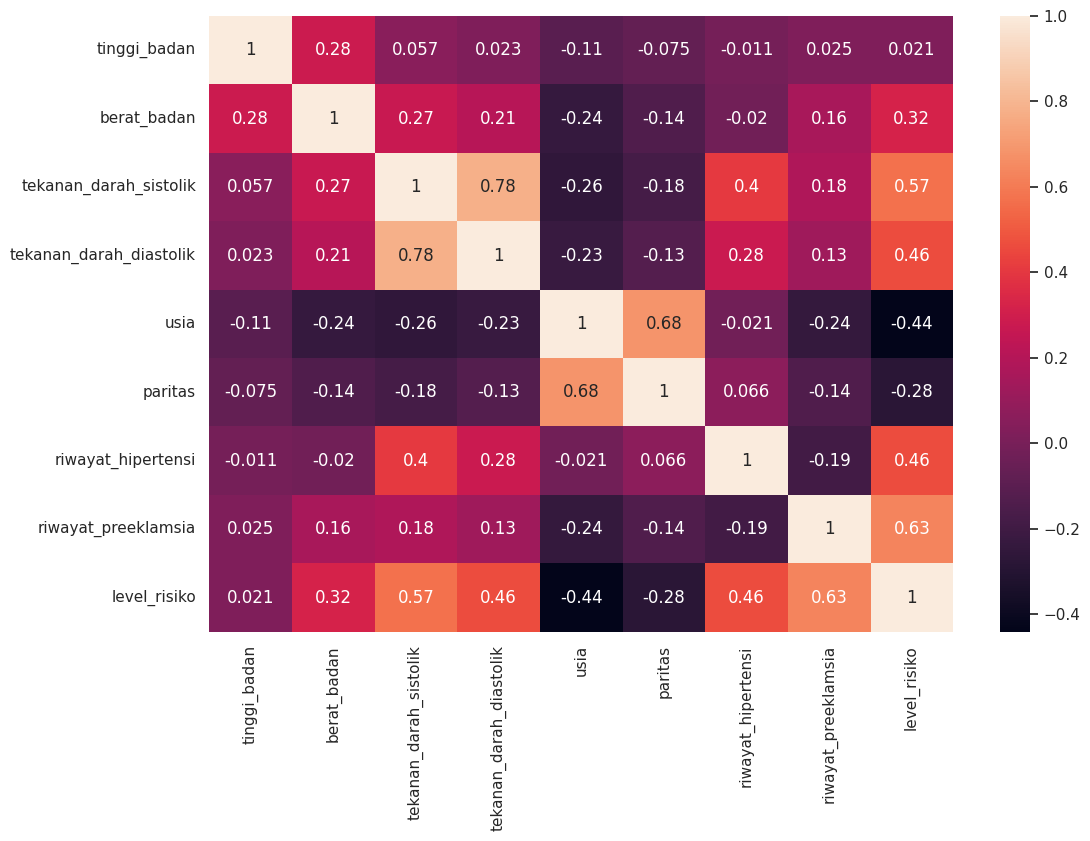

In [ ]:
# Membuat objek figure dengan ukuran 12x8 menggunakan fungsi figure() dari modul matplotlib.pyplot (plt)
plt.figure(figsize=(12, 8))

# Memplot heatmap korelasi antar kolom menggunakan heatmap() dari modul seaborn (sns)
# df.corr() digunakan untuk menghitung korelasi antar kolom dalam DataFrame df
# annot=True digunakan untuk menampilkan nilai korelasi pada heatmap
sns.heatmap(df.corr(), annot=True)

# Menampilkan plot
plt.show()

In [ ]:
#Ubah kategori pada kolom level_risiko menjadi interger
df['level_risiko'].replace({"Tinggi": 3, "Sedang": 2, "Tidak Berisiko" : 1}, inplace=True)
df.head()

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
0,155.0,79.0,110,70,33,0,0,0,1
1,150.0,64.0,120,85,22,0,0,0,1
2,152.0,66.0,130,80,39,3,0,0,1
3,150.0,69.0,120,77,30,3,0,0,1
4,146.0,72.0,200,120,32,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tinggi_badan             234 non-null    float64
 1   berat_badan              234 non-null    float64
 2   tekanan_darah_sistolik   234 non-null    int64  
 3   tekanan_darah_diastolik  234 non-null    int64  
 4   usia                     234 non-null    int64  
 5   paritas                  234 non-null    int64  
 6   riwayat_hipertensi       234 non-null    int64  
 7   riwayat_preeklamsia      234 non-null    int64  
 8   level_risiko             234 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 16.6 KB


Text(0.5, 1.0, 'Heatmap Koefisien Korelasi')

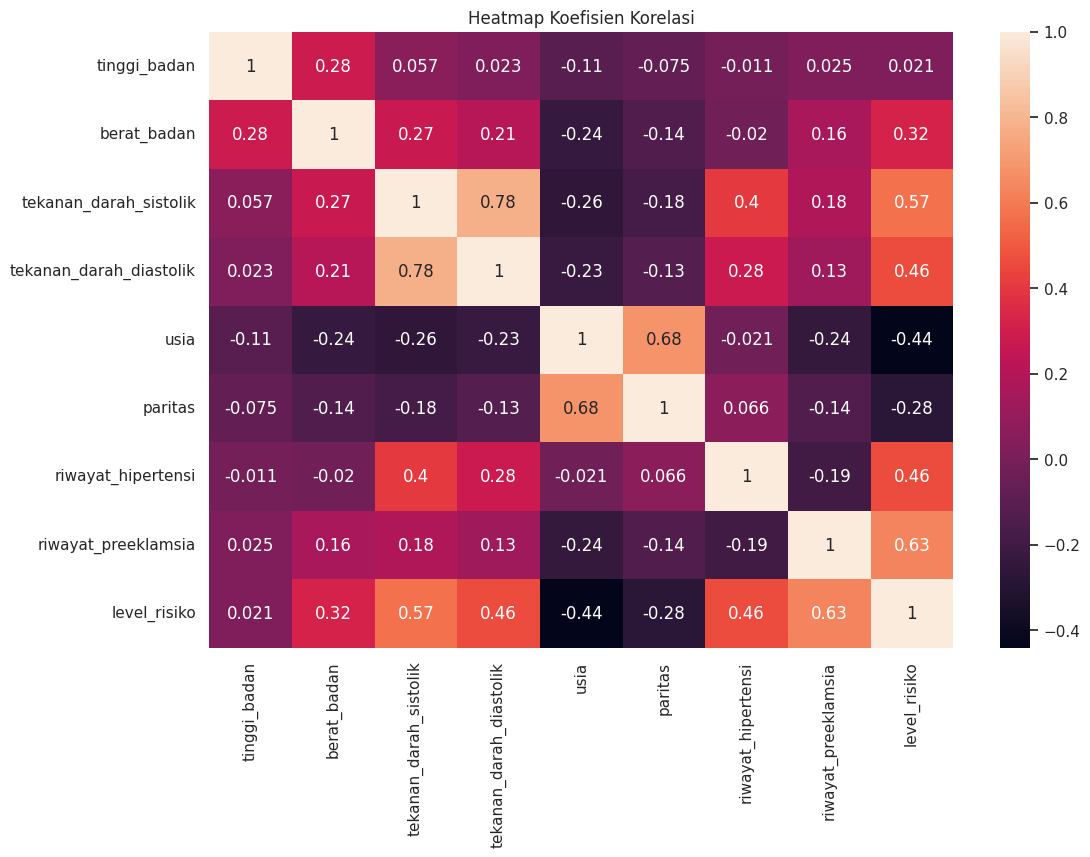

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df. corr(), annot=True)
plt.title('Heatmap Koefisien Korelasi')

In [ ]:
# Memisahkan variabel independen dan dependen
x = df.drop (columns="level_risiko", axis=1)     # Fitur/Atribut
y = df['level_risiko']                           # Label

In [ ]:
#Import library untuk membangun model prediksi
from sklearn.preprocessing import StandardScaler
#Standarisasi data
scaler = StandardScaler()
scaler.fit(x)
standarized_data = scaler.transform(x)

In [ ]:
#Masukan hasil standarisasi data ke variabel X
X = standarized_data
Y = df['level_risiko']

In [ ]:
#Bagi menjadi data training 80% dan data testing 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(187, 8) (47, 8) (187,) (47,)


## Modeling Machine Learning

In [ ]:
#Import library untuk mengukur model dari tiap metode yang diuji
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report,roc_curve

### K-Nearst Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

models = KNeighborsClassifier()

# Definisikan grid parameter untuk KNeighborsClassifier
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Contoh rentang nilai untuk jumlah tetangga
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 untuk manhattan_distance, 2 untuk euclidean_distance
}

# Inisialisasi objek GridSearchCV dengan fokus pada f1 score dan akurasi
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(models, param_grid, cv=5, scoring='accuracy')

# Lakukan Grid Search
grid_search.fit(X_train, Y_train)

# Dapatkan parameter terbaik dan akurasi terbaik
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Tampilkan hasil
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.9467994310099573


In [ ]:
models = {'KNN': KNeighborsClassifier(n_neighbors=8, p=1, weights= 'distance')}

modelNames = ['KNN']

trainScores = []
accuracyScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, Y_train)

    print(m)
    train_score = model.score(X_train, Y_train)
    print('Hasil score data training: ', train_score*100)
    trainScores.append(train_score*100)

    test_score = model.score(X_test, Y_test)
    print('Hasil score data testing: ', test_score*100)
    testScores.append(test_score*100)
    print(" ")

    Y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_predictions, Y_test)

    print('Confussion Matrix: \n', conf_matrix)

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, Y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy2  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)

    print('Accuracy : ', accuracy2)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1 score : ', f1score)
    print('Specificity : ', specificity)
    print("")
    print('Classification Report: \n', classification_report(predictions, Y_test))
    print("")

KNN
Hasil score data training:  100.0
Hasil score data testing:  95.74468085106383
 
Confussion Matrix: 
 [[14  1  0]
 [ 1 15  0]
 [ 0  0 16]]
Accuracy :  0.9354838709677419
Precision:  0.9375
Recall   :  0.9375
F1 score :  0.9375
Specificity :  0.9333333333333333

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        16

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47




In [ ]:
# Inisialisasi model KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11, p=2, weights= 'distance')

# Inisialisasi StratifiedKFold dengan jumlah lipatan (folds) sebanyak 5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation dengan StratifiedKFold
scores_KNN = cross_val_score(model, X, Y, cv=stratified_kfold, scoring='accuracy')

# Menampilkan skor cross-validation
print("Cross-Validation Scores:", scores_KNN)

# Menampilkan rata-rata dan deviasi standar skor
print("Rata-rata Accuracy:", np.mean(scores_KNN))
print("Deviasi Standar Accuracy:", np.std(scores_KNN))

Cross-Validation Scores: [0.93617021 0.91489362 0.89361702 0.93617021 0.97826087]
Rata-rata Accuracy: 0.931822386679001
Deviasi Standar Accuracy: 0.02807337907624891


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Definisikan grid parameter untuk DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi objek GridSearchCV dengan fokus pada akurasi
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Lakukan Grid Search
grid_search.fit(X, Y)

# Dapatkan parameter terbaik dan akurasi terbaik
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Tampilkan hasil
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.893432007400555


In [ ]:
models = {'Decision Tree': DecisionTreeClassifier (criterion='gini',max_depth=None,
                                                   min_samples_leaf=1, min_samples_split=2)}

modelNames = ['Decision Tree']

trainScores = []
accuracyScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, Y_train)

    print(m)
    train_score = model.score(X_train, Y_train)
    print('Hasil score data training: ', train_score*100)
    trainScores.append(train_score*100)

    test_score = model.score(X_test, Y_test)
    print('Hasil score data testing: ', test_score*100)
    testScores.append(test_score*100)
    print(" ")

    Y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_predictions, Y_test)

    print('Confussion Matrix: \n', conf_matrix)

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, Y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy2  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)

    print('Accuracy : ', accuracy2)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1 score : ', f1score)
    print('Specificity : ', specificity)
    print("")
    print('Classification Report: \n', classification_report(predictions, Y_test))
    print("")

Decision Tree
Hasil score data training:  100.0
Hasil score data testing:  95.74468085106383
 
Confussion Matrix: 
 [[14  1  0]
 [ 1 15  0]
 [ 0  0 16]]
Accuracy :  0.9354838709677419
Precision:  0.9375
Recall   :  0.9375
F1 score :  0.9375
Specificity :  0.9333333333333333

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        16

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47




In [ ]:
# Inisialisasi model DecisionTree
model = DecisionTreeClassifier (criterion='gini',max_depth=None,
                                                   min_samples_leaf=1, min_samples_split=2)

# Inisialisasi StratifiedKFold dengan jumlah lipatan (folds) sebanyak 5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation dengan StratifiedKFold
scores = cross_val_score(model, X, Y, cv=stratified_kfold, scoring='accuracy')

# Menampilkan skor cross-validation
print("Cross-Validation Scores:", scores)

# Menampilkan rata-rata dan deviasi standar skor
print("Rata-rata Accuracy:", np.mean(scores))
print("Deviasi Standar Accuracy:", np.std(scores))

Cross-Validation Scores: [0.95744681 0.93617021 0.95744681 0.9787234  0.91304348]
Rata-rata Accuracy: 0.9485661424606846
Deviasi Standar Accuracy: 0.022283229760432698


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Melakukan pencarian optimasi dan tuning pada metode Random Forest
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9467994310099573


In [ ]:
models = {'Random Forest': RandomForestClassifier (criterion='gini', max_depth=20, n_estimators=100,
                                                   min_samples_leaf=1, min_samples_split=2)}


trainScores = []
accuracyScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, Y_train)

    print(m)
    train_score = model.score(X_train, Y_train)
    print('Hasil score data training: ', train_score*100)
    trainScores.append(train_score*100)

    test_score = model.score(X_test, Y_test)
    print('Hasil score data testing: ', test_score*100)
    testScores.append(test_score*100)
    print(" ")

    Y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_predictions, Y_test)

    print('Confussion Matrix: \n', conf_matrix)

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, Y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy2  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)

    print('Accuracy : ', accuracy2)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1 score : ', f1score)
    print('Specificity : ', specificity)
    print("")
    print('Classification Report: \n', classification_report(predictions, Y_test))
    print("")

Random Forest
Hasil score data training:  100.0
Hasil score data testing:  95.74468085106383
 
Confussion Matrix: 
 [[15  1  0]
 [ 0 14  0]
 [ 0  1 16]]
Accuracy :  0.9666666666666667
Precision:  0.9333333333333333
Recall   :  1.0
F1 score :  0.9655172413793104
Specificity :  0.9375

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.88      1.00      0.93        14
           2       1.00      0.94      0.97        17

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47




In [ ]:
# Inisialisasi model Random Forest
model = RandomForestClassifier (criterion='gini', max_depth=20, n_estimators=100,
                                                   min_samples_leaf=1, min_samples_split=2)

# Inisialisasi StratifiedKFold dengan jumlah lipatan (folds) sebanyak 5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation dengan StratifiedKFold
scores = cross_val_score(model, X, Y, cv=stratified_kfold, scoring='accuracy')

# Menampilkan skor cross-validation
print("Cross-Validation Scores:", scores)

# Menampilkan rata-rata dan deviasi standar skor
print("Rata-rata Accuracy:", np.mean(scores))
print("Deviasi Standar Accuracy:", np.std(scores))

Cross-Validation Scores: [0.95744681 0.93617021 0.93617021 0.95744681 0.97826087]
Rata-rata Accuracy: 0.953098982423682
Deviasi Standar Accuracy: 0.015773992723066604


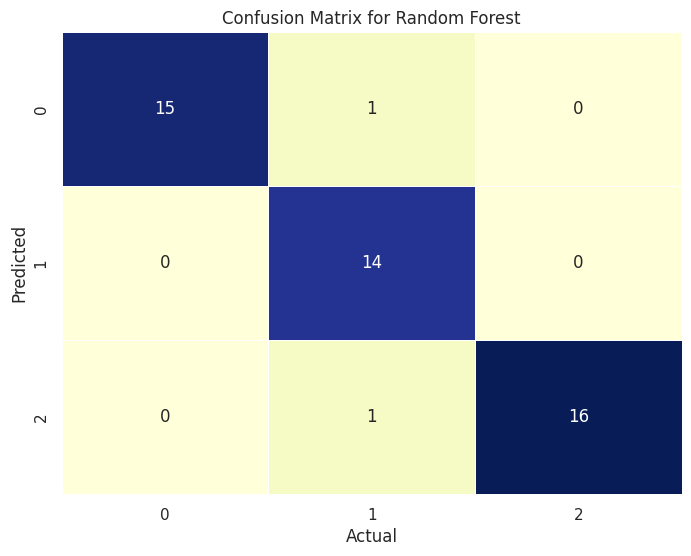

In [ ]:
# Confussion heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=False)
plt.title(f'Confusion Matrix for {m}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Save Model

In [ ]:
import pickle #library untuk menyimpan model dalam bentuk SAV

filename = 'preeklamsia_model.sav'
pickle.dump(forest, open(filename, 'wb'))

NameError: name 'forest' is not defined